## Text Classification Notebook applied on MoneyControl Dataset
#### Name: Hrishikesh Milind Mahajan
#### Roll No.: PC-45
#### Serial No.: 1032171054
##### Demo for sentiment analysis for seminar topic
##### <font color='red'>Do refer the dataset scraping notebook to get a better feel of the data.</font>

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading our dataset of news articles freshly scrapped from moneycontrol website
df1 = pd.read_csv('MoneyControl-First-1-10-Pages.csv')
df2 = pd.read_csv('MoneyControl-First-11-20-Pages.csv')
df = pd.concat([df1,df2])

In [4]:
# Removing unnecessary columns
df = df.iloc[:,1:]
df.head()

,time,Label,author,title,summary,description,article_text,url
0,"April 13, 2020 12:04 PM IST",1,Sunil Matkar,Max Financial gains 5% on Max Life extending i...,Max Financial Services share price rallied 4.7...,Max Life-Yes Bank relationship has over the ye...,Max Financial Services share price rallied 4.7...,https://www.moneycontrol.com/news/business/mar...
1,"April 13, 2020 08:55 PM IST",0,Kshitij Anand,Looking to invest in US market? Subscription f...,"On April 13, the company announced the launch ...",Motilal Oswal S&P 500® Index Fund will open fo...,If you wish to invest in companies based out o...,https://www.moneycontrol.com/news/business/mar...
2,"April 13, 2020 01:14 PM IST",0,Kshitij Anand,"Timing the market is not possible, but investo...",The choice of stocks vs mutual funds is always...,"Timing the market is not possible. However, at...","Timing the market is not possible. However, at...",https://www.moneycontrol.com/news/business/mar...
3,"April 13, 2020 02:34 PM IST",-2,Nishant Kumar,"Zee Entertainment share price plunges 14%, loo...",Zee Entertainment share price plunged over 14 ...,The company will extend financial and operatio...,Zee Entertainment share price plunged over 14 ...,https://www.moneycontrol.com/news/business/mar...
4,"April 13, 2020 11:45 AM IST",-1,Sunil Matkar,Bandhan Bank share price slips 10% despite str...,Bandhan Bank share price fell nearly 10 percen...,The capital adequacy ratio of the bank at the ...,Bandhan Bank share price fell nearly 10 percen...,https://www.moneycontrol.com/news/business/mar...


In [5]:
# Searching for empty cells
df.isnull().sum()
# We do not require authors as of yet so we can ignore those missing values
# The following model will be applied on titles only

time             0
Label            0
author          32
title            0
summary          0
description      8
article_text     0
url              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 218
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          457 non-null    object
 1   Label         457 non-null    int64 
 2   author        425 non-null    object
 3   title         457 non-null    object
 4   summary       457 non-null    object
 5   description   449 non-null    object
 6   article_text  457 non-null    object
 7   url           457 non-null    object
dtypes: int64(1), object(7)
memory usage: 32.1+ KB


#### Dataset news articles have been labeled are as follows:
    -2 Label Score -> Very Negative News
    -1 Label Score -> Negative News
     0 Label Score -> Neutral News
     1 Label Score -> Positive News
     2 Label Score -> Very Positive News
     
Since so many classes will not be correctly classified with the help of simpler machine learning models we will map the scores as follows...

    -1 Label Score -> Negative News
     1 Label Score -> Positive News

In [7]:
maps = {2: 1, 1: 1, 0: 0, -1: -1, -2: -1}

In [8]:
x = [1, 2, -1, -1, -2, 0]

In [9]:
df.Label = [maps[i] for i in df.Label]

In [10]:
df01 = df[df.Label != 0]

In [11]:
X = df01['title']
y = df01['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [13]:
predictions = text_clf.predict(X_test)

In [15]:
from sklearn import metrics
metrics.confusion_matrix(predictions, y_test)

array([[34, 15],
       [10, 64]], dtype=int64)

In [16]:
metrics.accuracy_score(predictions, y_test)

0.7967479674796748

### Trying to explain poor accuracy of negative news articles
    Looking at the histogram below it is clear that the number of positive news articles far exceeds the negative news articles, hence this maybe one of the possible explantions that there does not exist enough training data for the negative news articles.
    Solution for the same: Scrape from more websites or simply add in more negative news articles.

(array([169.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 238.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

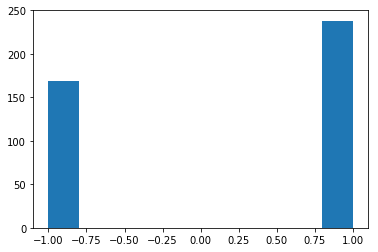

In [17]:
plt.hist(df01.Label)

### Examples of the model in action
    We provide the model with unseen headlines and it shall classify the same as positive and negative, do recall that...
    -1 Label Score Means news article is negative
     1 Label Score Means news article is positive

In [18]:
text_clf.predict(["Pharma sector stocks gain 20% amid Covid-19 pandemic"])

array([1], dtype=int64)

In [19]:
text_clf.predict(["SENSEX down by 1450 points"])

array([-1], dtype=int64)

In [20]:
text_clf.predict(["Kotak Equities suggests buy on IBM stock."])

array([1], dtype=int64)

In [21]:
text_clf.predict(["Tata Motors falls 8% auto markets in decline. "])

array([-1], dtype=int64)

In [ ]:
df.to_csv("MoneyControl-First-1-20")